In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

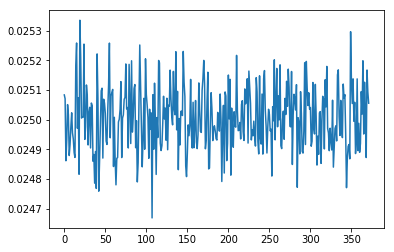

In [4]:
# normal
rateNormal = np.random.normal(0.025,0.0001,12*31)
data = pd.DataFrame(rateNormal)

plt.plot(rateNormal)
plt.show()

In [12]:
# vasicek
R0 = 0.0275
miu = 0.0275
theta = 0.5
sigma = 0.005
M =100000
deltaT = 1/M
T=31

In [13]:
l=[]
for s in range(1,11):
    np.random.seed(s)
    w = np.random.normal(0,1*np.sqrt(deltaT),M*T)

    t = np.linspace(0,T,M*T,endpoint = False)

    temp = sigma*np.exp(theta*t)*w
    sto = np.add.accumulate(temp)*np.exp(-theta*t)
    r = np.exp(-theta*t)*R0 + miu*(1-np.exp(-theta*t))+sto

##############
    ltemp=[]
    for y in range(2004,2035):
        for m in range(1,13):
            ltemp.append(dt.date(y,m,1))

    a=np.array(ltemp)
    rate = r[((a-dt.date(2004,1,1))/dt.timedelta(days=365*T)*T*M).astype(int)]
    #len(rate)
    l.append(rate)



In [14]:
rateVasicek = pd.DataFrame({'date':a})
for i in range(1,11):
    rateVasicek[str(i)]=l[i-1]

In [15]:
rateVasicek.head(10)

,date,1,2,3,4,5,6,7,8,9,10
0,2004-01-01,0.027526,0.027493,0.027528,0.027501,0.027507,0.027495,0.027527,0.027501,0.027500,0.027521
1,2004-02-01,0.028324,0.024854,0.024040,0.028328,0.027476,0.030159,0.025403,0.028056,0.026760,0.026781
2,2004-03-01,0.030053,0.027250,0.023092,0.027902,0.028314,0.027094,0.025270,0.025800,0.026419,0.027851
3,2004-04-01,0.029880,0.027321,0.023835,0.027599,0.027725,0.027713,0.025152,0.027686,0.028006,0.026661
4,2004-05-01,0.028801,0.026795,0.022878,0.027985,0.028971,0.026430,0.025013,0.026992,0.025686,0.027536
5,2004-06-01,0.030211,0.028894,0.024341,0.027546,0.026705,0.024845,0.026962,0.026122,0.026475,0.030065
6,2004-07-01,0.029872,0.027184,0.025934,0.027641,0.029488,0.022613,0.025016,0.027327,0.023514,0.029856
7,2004-08-01,0.031291,0.026067,0.024908,0.028085,0.030636,0.022685,0.025513,0.026894,0.022035,0.028835
8,2004-09-01,0.029286,0.025126,0.027734,0.024550,0.032005,0.021422,0.024154,0.024027,0.019421,0.028095
9,2004-10-01,0.028370,0.024197,0.024953,0.024179,0.034326,0.021683,0.024784,0.025603,0.021120,0.025745
